In [1]:
import numpy as np
import matplotlib.pyplot as plt
from FlowControl import add_to_class

In [2]:
from matplotlib import cm

<h1>K-means Clustering</h1>

<h2>1. Theoretical motivation</h2>

<h3>1.1 Algorithm</h3>

Let's suppose that we are given a set of data for which we can distinguish different clusters. If we assume that there are k distinct clusters then the algorithm is:
1. Initialize randomly $\vec{\mu}_{1},\ldots, \vec{\mu}_{k} \in \mathbb{R}^{d}$.
2. For $i$ in $1:\text{num-of-steps}$:
    - compute $D^{(i)} = \text{arg min}_{j}d(\vec{x}^{(i)},\vec{\mu}_{j})$
    - reset centroids vector: 
    $$
    \vec{\mu}_{j} = \frac{\sum_{i=1}^{n}\delta_{D^{(i)},j}\vec{x}^{(i)}}{\sum_{i=1}^{n}\delta_{D^{(i)},j}}
    $$

We choose to measure convergence with respect to the loss function:
$$
J(D,\vec{\mu}) = \sum_{i=1}^{n}\sum_{j=1}^{k}\delta_{D^{(i)},j}d(\vec{x}^{(i)},\vec{\mu}_{j})
$$

<h3>1.2 Possible issues</h3>

We can identify 2 main issues:
1. Algorithm may reach local minima.
2. Chosen number of clusters $k$ may not be suffiecient or may be to large.

How to address those issues?
1. Run your algorithm couple times with different initialized $\mu$ vectors.
2. Run your algorithm couple times for different $k$ and evaluate each choice by comparing the loss function.

In [3]:
class KMeans:
    def __init__(self,k,seed = 45):
        self.k = k
        self.rng = np.random.default_rng(seed) 

    def fit(self,X_data,steps = 50,metric = "Minkowski",p = 2):
        _,m = X_data.shape
        self.mu = np.mean(X_data,axis = 0)[:,np.newaxis] + self.rng.normal(loc = 0.,scale = 0.5,size = m*self.k).reshape(m,self.k)
        J = []
        for _ in range(steps):
            dist = self.distance(X_data,metric,p)
            Di = np.argmin(dist,axis = 1)
            delta = Di[:,np.newaxis] == np.arange(self.k)[np.newaxis,:]
            up = np.sum(delta[:,np.newaxis,:] * X_data[:,:,np.newaxis],axis = 0)
            dwn1 = np.sum(delta,axis = 0)
            down = np.where(dwn1==0,np.inf,dwn1)
            self.mu = up/down
            J.append(self.loss(dist,Di))
        return Di,J

    def distance(self,X_data,metric,p):
        Delta = X_data[:,:,np.newaxis] - self.mu[np.newaxis,:,:]
        if metric == "Manhattan":
            return np.sum(np.abs(Delta),axis = 1)
        elif metric == "Minkowski":
            return np.sum(np.abs(Delta)**p,axis = 1) ** (1/p)
        elif metric == "MinManhattan":
            return np.max(np.abs(Delta),axis = 1)
        else:
            return np.sqrt(np.sum(Delta**2,axis = 1))
            
    def loss(self,dist,Di):
        return sum(sum((Di == j) * dist[:,j] for j in range(self.k)))

<h2>2. Testing model</h2>

<h3>2.1 Iris dataset</h3>

In [4]:
from sklearn.datasets import load_iris

data_set = load_iris()

X_data = data_set["data"]
X_names = data_set["feature_names"]
n,m = X_data.shape

In [5]:
model_kmeans = KMeans(3)
y_pred,J_ = model_kmeans.fit(X_data)

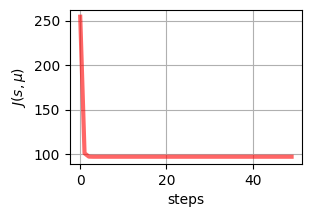

In [6]:
fig = plt.figure(figsize = (3,2))

ax = fig.add_subplot()
ax.plot(J_,color = "red",lw = 3,alpha = 0.6)
ax.set_xlabel("steps")
ax.set_ylabel(r"$J(s,\mu)$")
ax.grid(True)

plt.show()

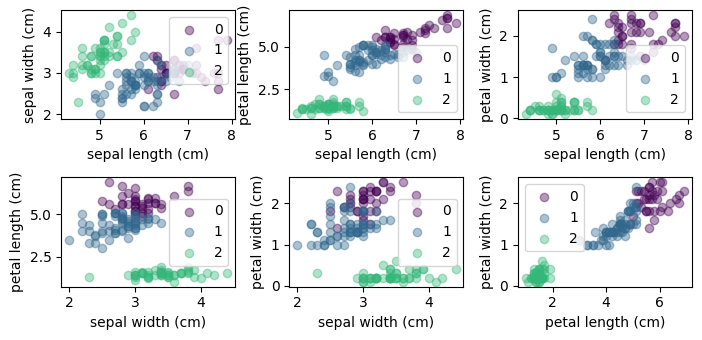

In [7]:
fig = plt.figure(figsize=(7,3.5))
p = 0
classes = np.unique(y_pred)
colors = [cm.viridis(i / len(classes)) for i in range(len(classes))]

for i in range(m):
    for j in range(i+1,m):
        p+=1
        ax = fig.add_subplot(2,3,p)
        for c in range(len(classes)):
            cl = (y_pred == classes[c])
            ax.scatter(X_data[cl,i],X_data[cl,j],color = colors[c],alpha = 0.4,label = classes[c])
            ax.set_xlabel(X_names[i])
            ax.set_ylabel(X_names[j])
        ax.legend()
plt.tight_layout()
plt.show()

<h3>2.2 MNIST dataset</h3>

In [22]:
from sklearn.datasets import load_digits

data_set_dig = load_digits()

X_data_dig = data_set_dig["data"]
print(X_data_dig.shape)

(1797, 64)


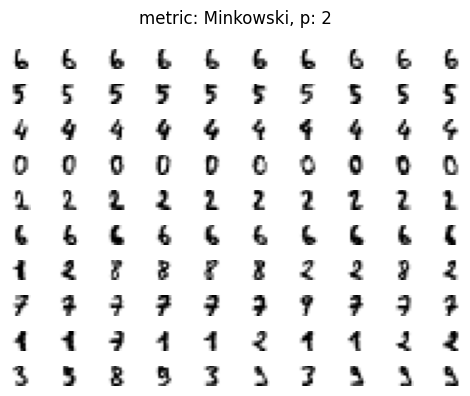

In [23]:
metric = "Minkowski"
p = 2
model_kmeans_dig = KMeans(10)
y_pred_dig,J_dig = model_kmeans_dig.fit(X_data_dig,metric = metric, p = p)

fig = plt.figure(figsize = (5,4))

for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10, 10*i+j+1)
        X_im = X_data_dig[(y_pred_dig == i),:][j]
        ax.imshow(X_im.reshape(8,8),cmap="binary")
        plt.axis('off')
fig.suptitle(f"metric: {metric}, p: {p}")
plt.tight_layout()
plt.show()

# each row represent a single class found by algorithm

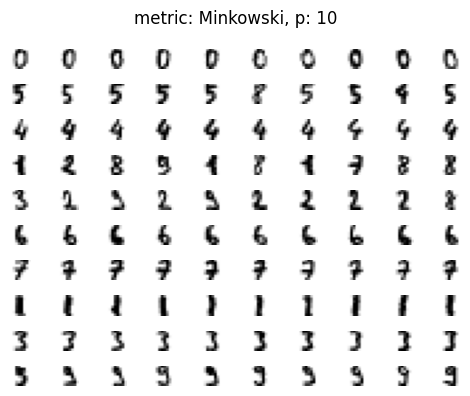

In [24]:
metric = "Minkowski"
p = 10
model_kmeans_dig = KMeans(10)
y_pred_dig,J_dig = model_kmeans_dig.fit(X_data_dig,metric = metric, p = p)

fig = plt.figure(figsize = (5,4))

for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10, 10*i+j+1)
        X_im = X_data_dig[(y_pred_dig == i),:][j]
        ax.imshow(X_im.reshape(8,8),cmap="binary")
        plt.axis('off')
fig.suptitle(f"metric: {metric}, p: {p}")
plt.tight_layout()
plt.show()

# each row represent a single class found by algorithm

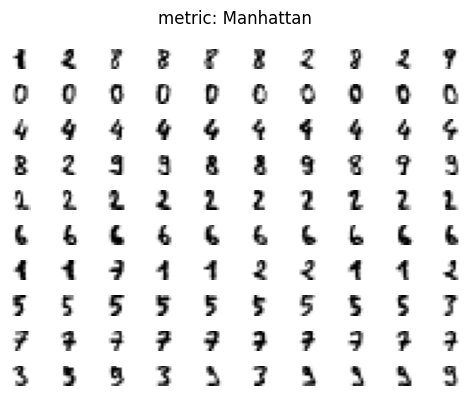

In [25]:
metric = "Manhattan"

model_kmeans_dig = KMeans(10)
y_pred_dig,J_dig = model_kmeans_dig.fit(X_data_dig,metric = metric)

fig = plt.figure(figsize = (5,4))

for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10, 10*i+j+1)
        X_im = X_data_dig[(y_pred_dig == i),:][j]
        ax.imshow(X_im.reshape(8,8),cmap="binary")
        plt.axis('off')
fig.suptitle(f"metric: {metric}")
plt.tight_layout()
plt.show()

# each row represent a single class found by algorithm

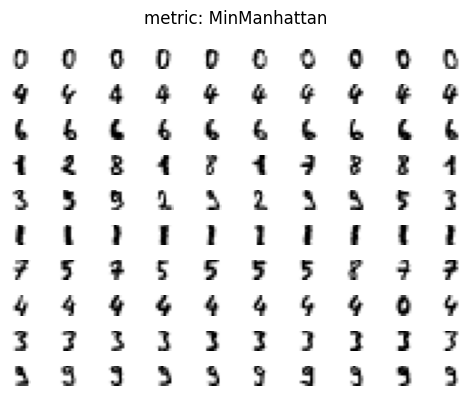

In [26]:
metric = "MinManhattan"

model_kmeans_dig = KMeans(10)
y_pred_dig,J_dig = model_kmeans_dig.fit(X_data_dig,metric = metric)

fig = plt.figure(figsize = (5,4))

for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10,10, 10*i+j+1)
        X_im = X_data_dig[(y_pred_dig == i),:][j]
        ax.imshow(X_im.reshape(8,8),cmap="binary")
        plt.axis('off')
fig.suptitle(f"metric: {metric}")
plt.tight_layout()
plt.show()

# each row represent a single class found by algorithm